In [321]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Core-pan analysis
- Based on similarity/core level
- Different represenations

# Example data set  (Chromosome 1)

In [34]:
# File
f = "../results/core/chr1.gfastats.core.txt"
fpath = "/".join(f.split("/")[:-1])

In [35]:
# Read the file
df = pd.read_csv(f, sep = "\t", index_col = 0)
df.head()

,Sequence[bp],#Node
Feature,,
10002_Chr1,373560,20216
10015_Chr1,557664,17843
10024_Chr1,698089,41121
1741_Chr1,506501,21081
22001_Chr1_mod2,311477,10420


In [36]:
# When is the split?
split_index = [i for i, x in enumerate(df.index) if x == "1"][0]
split_index

29

In [37]:
# Check what is going on
df_seqc = df.iloc[split_index+1:, :]
df_seqc

,Sequence[bp],#Node
Feature,,
2,4578566,301595
3,2262735,166592
4,1522631,126297
5,1146987,101552
6,812941,80383
7,678672,70614
8,628454,67826
9,546373,62432
10,400938,56279


In [38]:
df_seqc2 = df.iloc[:split_index-1, :]
df_seqc2 = df_seqc2.sort_values("Sequence[bp]")
df_seqc2.index = [x.split("_")[0] for x in df_seqc2.index]
df_seqc2

,Sequence[bp],#Node
6909,84387,1580
6069,210983,15463
22006,232982,16784
6024,251001,15691
22001,311477,10420
22002,315494,19413
9728,352925,19925
6966,361839,19168
9888,363235,23199
10002,373560,20216


Text(0.5, 0, 'Similarity (Number of samples)')

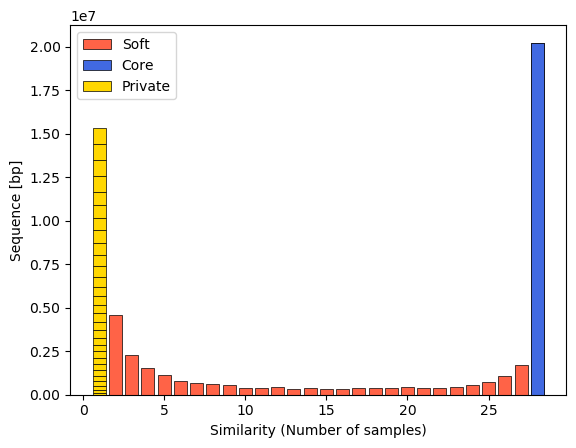

In [39]:
# This is the plot for one chromosome (sequence)
plt.bar([int(x) for x in df_seqc.index], df_seqc["Sequence[bp]"], edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in df_seqc.index][-1], df_seqc["Sequence[bp]"][-1], edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in df_seqc2.iterrows():
    plt.bar(1, (x[1]["Sequence[bp]"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["Sequence[bp]"])
plt.bar(1, (x[1]["Sequence[bp]"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("Sequence [bp]")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
#plt.savefig("pancore.png", dpi = 400)

Text(0.5, 0, 'Similarity (Number of samples)')

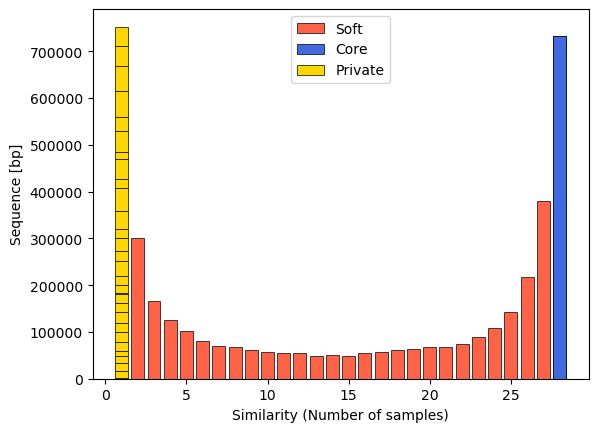

In [40]:
# This is the plot for one chromosome (Node)
plt.bar([int(x) for x in df_seqc.index], df_seqc["#Node"], edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in df_seqc.index][-1], df_seqc["#Node"][-1], edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in df_seqc2.iterrows():
    plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["#Node"])
plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("Sequence [bp]")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
#plt.savefig("pancore.png", dpi = 400)

# Pie chart 

In [41]:
# This is for the pie chart
df_seqc_all = df.iloc[split_index:, :]
df_seqc_all.head()

,Sequence[bp],#Node
Feature,,
1,14340159,703342
2,4578566,301595
3,2262735,166592
4,1522631,126297
5,1146987,101552


In [42]:
# Get the different amounts (sequence)
private = df_seqc_all["Sequence[bp]"][0]
soft = sum(df_seqc_all["Sequence[bp]"][1:-1])
core = df_seqc_all["Sequence[bp]"][-1]
print(private, soft, core)

14340159 21625037 20224417


In [43]:
# Labels if needed
labels = ["Private", "Soft", "Core"], 

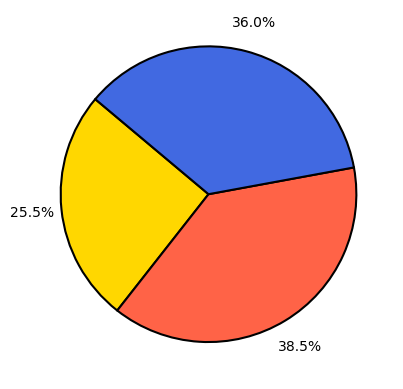

In [44]:
# Plot the pie
plt.pie([private, soft, core], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2); 

In [45]:
# Get the different amounts (node)
node_private = df_seqc_all["#Node"][0]
node_soft = sum(df_seqc_all["#Node"][1:-1])
node_core = df_seqc_all["#Node"][-1]
print(private, soft, core)

14340159 21625037 20224417


In [46]:
# Oldcolors
edgecolors = ['black', 'red', 'green', 'blue', 'purple']


([<matplotlib.patches.Wedge at 0x7ff09cf10a20>,
 [Text(-1.085771815675968, 0.17635068552095898, ''),
  Text(0.8268123552617423, -0.7255214188337451, ''),
  Text(-0.3391645817980781, 1.0464068933515944, '')],
 [Text(-1.184478344373783, 0.19238256602286433, '17.1%'),
  Text(0.9019771148309915, -0.7914779114549946, '65.1%'),
  Text(-0.36999772559790334, 1.1415347927471937, '17.8%')])

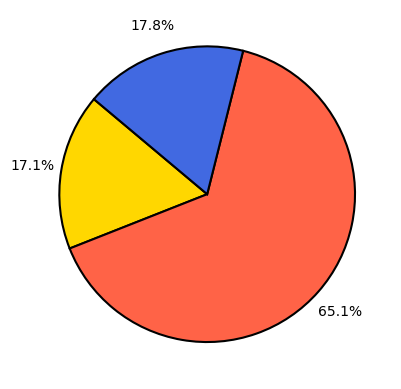

In [47]:
# Plot the pie
plt.pie([node_private, node_soft, node_core], autopct='%1.1f%%', startangle=140, 
              wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, 
        colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)

## Normalize pie

In [48]:
# Normalize the values accordingly 
private_norm = df_seqc_all["Sequence[bp]"][0]/28
soft_norm = sum([x * ((i+2)/28) for i,x in enumerate(df_seqc_all["Sequence[bp]"][1:-1])])
core_norm = df_seqc_all["Sequence[bp]"][-1]
print(private_norm, soft_norm, core_norm)

512148.53571428574 8646922.0 20224417


([<matplotlib.patches.Wedge at 0x7ff09cda2198>,
 [Text(-0.8800836541313539, 0.6598884464292457, ''),
  Text(-1.0385307195104434, -0.36256577973261767, ''),
  Text(1.0568174608027536, 0.3051833130143593, '')],
 [Text(-0.960091259052386, 0.7198783051955406, '1.7%'),
  Text(-1.1329426031023018, -0.39552630516285564, '29.4%'),
  Text(1.1528917754211856, 0.3329272505611192, '68.8%')])

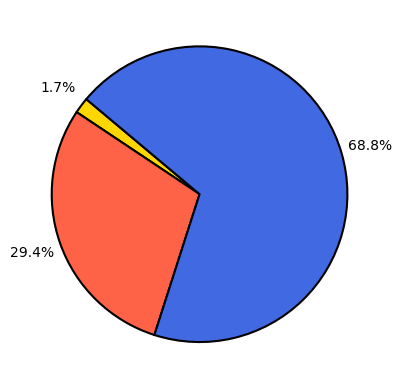

In [49]:
# Plot the pie
plt.pie([private_norm, soft_norm, core_norm], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)

In [50]:
df_seq_chr1 = df_seqc
df_seq2_chr1 = df_seqc2
df_seq_all_chr1 = df_seqc_all


# All chromosomes together

In [51]:
chrom = [1,2,3,4,5]

In [52]:
dfs = []
dfs2 = []


for x in chrom[1:]: 
    # Read the file
    ftemp = fpath + "/chr" + str(x) + ".gfastats.core.txt"
    df = pd.read_csv(ftemp, sep = "\t", index_col = 0)
    
    split_index = [i for i, x in enumerate(df.index) if x == "1"][0]
    split_index
    
    # Check what is going on
    df_seq = df.iloc[split_index:, :]
    
    df_seq2 = df.iloc[:split_index-1, :]
    df_seq2 = df_seq2.sort_values("Sequence[bp]")
    df_seq2.index = [x.split("_")[0] for x in df_seq2.index]
    
    

    dfs.append(df_seq)
    dfs2.append(df_seq2)




In [53]:
merged_df = pd.concat(dfs, axis=0, ignore_index=False)
merged_df2 = pd.concat(dfs2, axis=0, ignore_index=False)

In [54]:
merged_df_sum = merged_df.groupby(merged_df.index, axis=0).sum()
merged_df_sum.index = merged_df_sum.index.astype(int)
merged_df_sum = merged_df_sum.sort_index()
merged_df_sum_red = merged_df_sum.drop(1)
merged_df_sum_red.head()

,Sequence[bp],#Node
Feature,,
2,14529373,994915
3,7844242,586850
4,5537480,432120
5,3764624,330116
6,2937783,267487


In [55]:
merged_df2_sum = merged_df2.groupby(merged_df2.index, axis=0).sum()
merged_df2_sum = merged_df2_sum.sort_values("Sequence[bp]")

merged_df2_sum.head()

,Sequence[bp],#Node
6909,238336,5676
TAIR10,431419,3679
10015,827199,38783
22006,894753,63163
9888,1020445,79506


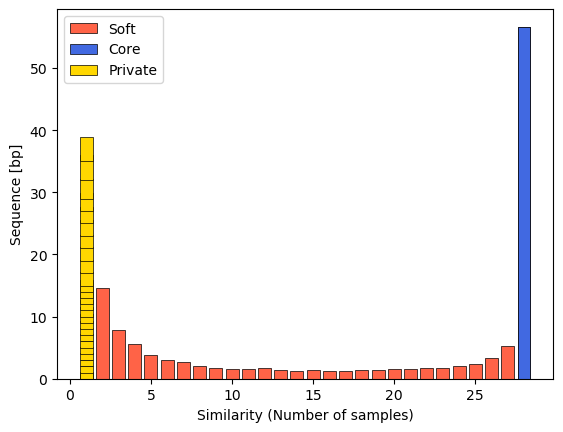

In [56]:
# This is the plot for one chromosome (sequence)
plt.bar([int(x) for x in merged_df_sum_red.index], merged_df_sum_red["Sequence[bp]"]/1000000, edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in merged_df_sum_red.index][-1], merged_df_sum_red["Sequence[bp]"].values[-1]/1000000, edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in merged_df2_sum.iterrows():
    plt.bar(1, (x[1]["Sequence[bp]"]/1000000), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["Sequence[bp]"]/1000000)
plt.bar(1, (x[1]["Sequence[bp]"]/1000000), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("Sequence [bp]")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
plt.savefig("plots/pancore/pancore.seq.png", dpi = 400)
plt.savefig("plots/pancore/pancore.seq.svg", dpi = 400)

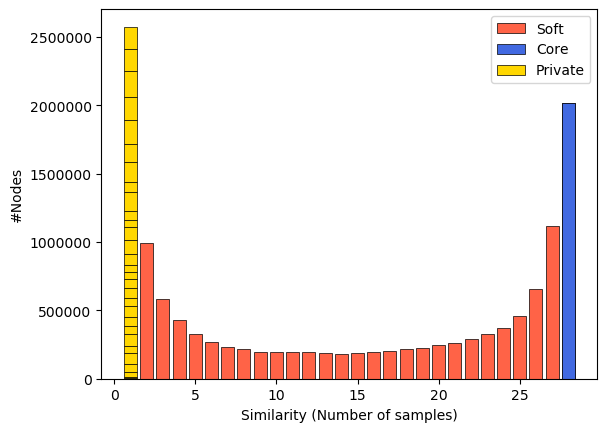

In [57]:
# This is the plot for one chromosome (Node)
plt.bar([int(x) for x in merged_df_sum_red.index], merged_df_sum_red["#Node"], edgecolor = "black", linewidth = 0.5, color = "tomato", label = "Soft")
plt.bar([int(x) for x in merged_df_sum_red.index][-1], merged_df_sum_red["#Node"].values[-1], edgecolor = "black", linewidth = 0.5, color = "royalblue", label = "Core")

bottom1 = 0
for x in merged_df2_sum.iterrows():
    plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5)
    bottom1 += int(x[1]["#Node"])
plt.bar(1, (x[1]["#Node"]), color = "gold", bottom = bottom1, edgecolor = "black", linewidth = 0.5, label = "Private")

plt.ylabel("#Nodes")
plt.legend()
plt.xlabel("Similarity (Number of samples)")
plt.savefig("plots/pancore/pancore.node.png", dpi = 400)
plt.savefig("plots/pancore/pancore.node.svg", dpi = 400)

In [58]:
merged_df_sum.sum()

Sequence[bp]    177497963
#Node            13370876
dtype: int64

In [59]:
# Get the different amounts (sequence)
private = merged_df_sum["Sequence[bp]"].values[0]
soft = sum(merged_df_sum["Sequence[bp]"].values[1:-1])
core = merged_df_sum["Sequence[bp]"].values[-1]
print(private, soft, core)
print(sum([private, soft, core]))

46270266 74563310 56664387
177497963


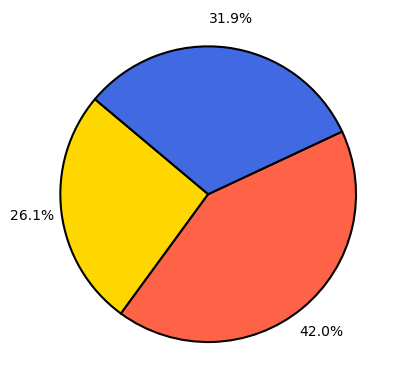

In [60]:
# Plot the pie
plt.pie([private, soft, core], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2); 
plt.savefig("plots/pancore/pie.total.seq.png", dpi = 400)
plt.savefig("plots/pancore/pie.total.seq.svg", dpi = 400)

In [61]:
# Get the different amounts (node)
node_private = df_seqc_all["#Node"].values[0]
node_soft = sum(df_seqc_all["#Node"].values[1:-1])
node_core = df_seqc_all["#Node"].values[-1]
print(private, soft, core)

46270266 74563310 56664387


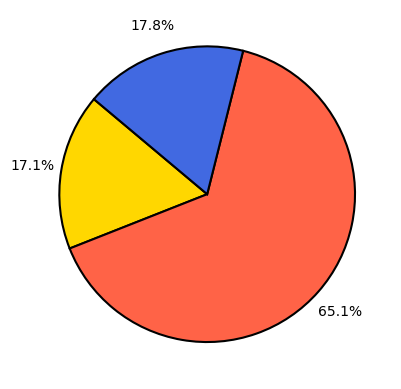

In [62]:
# Plot the pie
plt.pie([node_private, node_soft, node_core], autopct='%1.1f%%', startangle=140, 
              wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, 
        colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)
plt.savefig("plots/pancore/pie.total.node.png", dpi = 400)
plt.savefig("plots/pancore/pie.total.node.svg", dpi = 400)

In [63]:
# Normalize the values accordingly 
private_norm = df_seqc_all["Sequence[bp]"].values[0]/28
soft_norm = sum([x * ((i+2)/28) for i,x in enumerate(df_seqc_all["Sequence[bp]"].values[1:-1])])
core_norm = df_seqc_all["Sequence[bp]"].values[-1]
print(private_norm, soft_norm, core_norm)

512148.53571428574 8646922.0 20224417


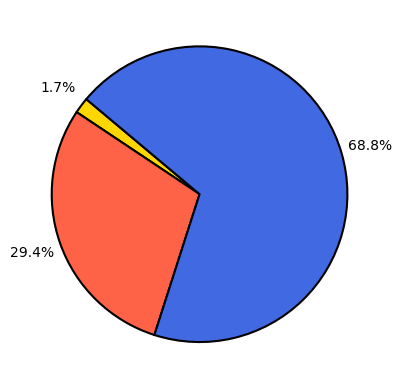

In [64]:
# Plot the pie
plt.pie([private_norm, soft_norm, core_norm], autopct='%1.1f%%', startangle=140,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1.5,
                      'antialiased': True}, colors = ["Gold", "Tomato", "Royalblue"],
        pctdistance=1.2)
plt.savefig("plots/pancore/pie.acc.seq.png", dpi = 400)
plt.savefig("plots/pancore/pie.acc.seq.svg", dpi = 400)